In [1]:
import pandas as pd
import numpy as np


import regex as re


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


from datetime import datetime

## Related Artist DataFrame 

Data cleaning process for related artist info obtained from Spotify's API

In [2]:
artist = pd.read_csv('df_related_artists_basic_info_total_1.csv')

In [3]:
artist.head()

,SpotifyArtistID,ArtistName,ArtistGenres,SpotifyArtistFollowers,SpotifyArtistPopularity
0,1vJHfCreWAS46V8RZ67ojo,Ben Klock,"['german techno', 'minimal techno', 'techno']",102165,37
1,2xrOogbM0l6NzOSp4zZ3IP,DVS1,['minimal dub'],27562,28
2,3dds88EVSeBgkPCJ47ZzRZ,Shed,"['ambient techno', 'bass music', 'dub techno',...",18216,31
3,7umQgFrDu3yrchEbFfJd60,Planetary Assault Systems,"['acid house', 'dub techno', 'electro', 'float...",28176,32
4,3XsZjgYO83dSNppZzXlzFB,Norman Nodge,['modular techno'],4883,16


In [4]:
# Extrating the list re-populating column ArtistGenres, the item extracted from the API is an obtect/str

artist.ArtistGenres = [re.findall( "(\w+)" , item) for item in artist.ArtistGenres]

In [5]:
# Extrating the list from column ArtistGenres, the item extracted from the API is an obtect/str

genres = artist.ArtistGenres


# Frequency dictionary applied to our genres list 

genre_dict = {}
for i in genres:
    for j in i:
        if j not in genre_dict:
            genre_dict[j]=1
        else:
            genre_dict[j]+=1

In [6]:
# Turning genre_dict into a pd.DataFrame for visualization

genre_freq = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['Frequency'])
genre_freq = genre_freq.reset_index()
genre_freq = genre_freq.rename(columns={'index':'Genre'})


# Top Genres by frequency 

freq_top10 = genre_freq.nlargest(40, 'Frequency')

In [7]:
# DYI Get Dummies considering significant genres. Spotify's genres could be better categorized... just sayin 


house_list = [1 if 'house' in item else 0 for item in artist.ArtistGenres]
artist['House'] = house_list

techno_list = [1 if 'techno' in item else 0 for item in artist.ArtistGenres]
artist['Techno'] = techno_list

experimental_list = [1 if 'experimental' in item else 0 for item in artist.ArtistGenres]
artist['Experimental'] = experimental_list

bass_list = [1 if 'bass' in item else 0 for item in artist.ArtistGenres]
artist['Bass'] = bass_list

electronic_list = [1 if 'electronica' in item else 0 for item in artist.ArtistGenres]
artist['Electronic'] = electronic_list

dub_list = [1 if 'dub' in item else 0 for item in artist.ArtistGenres]
artist['Dub'] = dub_list

ambient_list = [1 if 'ambient' in item else 0 for item in artist.ArtistGenres]
artist['Ambient'] = ambient_list

minimal_list = [1 if 'minimal' in item else 0 for item in artist.ArtistGenres]
artist['Minimal'] = minimal_list

club_list = [1 if 'club' in item else 0 for item in artist.ArtistGenres]
artist['Club'] = club_list

microhouse_list = [1 if 'microhouse' in item else 0 for item in artist.ArtistGenres]
artist['MicroHouse'] = microhouse_list

deconstructed_list = [1 if 'deconstructed' in item else 0 for item in artist.ArtistGenres]
artist['Deconstructed'] = deconstructed_list

deep_list = [1 if 'deep' in item else 0 for item in artist.ArtistGenres]
artist['Deep'] = deep_list

dubstep_list = [1 if 'dubstep' in item else 0 for item in artist.ArtistGenres]
artist['Dubstep'] = dubstep_list

classic_list = [1 if 'classic' in item else 0 for item in artist.ArtistGenres]
artist['Classic'] = classic_list

garage_list = [1 if 'garage' in item else 0 for item in artist.ArtistGenres]
artist['Garage'] = garage_list

future_list = [1 if 'future' in item else 0 for item in artist.ArtistGenres]
artist['Future'] = future_list

footwork_list = [1 if 'footwork' in item else 0 for item in artist.ArtistGenres]
artist['Footwork'] = footwork_list

pop_list = [1 if 'pop' in item else 0 for item in artist.ArtistGenres]
artist['Pop'] = pop_list

rock_list = [1 if 'rock' in item else 0 for item in artist.ArtistGenres]
artist['Rock'] = rock_list

metal_list = [1 if 'metal' in item else 0 for item in artist.ArtistGenres]
artist['Metal'] = metal_list

jungle_list = [1 if 'jungle' in item else 0 for item in artist.ArtistGenres]
artist['Jungle'] = jungle_list

dance_list = [1 if 'dance' in item else 0 for item in artist.ArtistGenres]
artist['Dance'] = dance_list

trance_list = [1 if 'trance' in item else 0 for item in artist.ArtistGenres]
artist['Trance'] = trance_list

new_list = [1 if 'new' in item else 0 for item in artist.ArtistGenres]
artist['New'] = new_list

world_list = [1 if 'world' in item else 0 for item in artist.ArtistGenres]
artist['World'] = world_list

drumfunk_list = [1 if 'drumfunk' in item else 0 for item in artist.ArtistGenres]
artist['Drumfunk'] = drumfunk_list

In [8]:
# Creating a column for other genres than the ones analyzed previously

other_list = []

genre_list = ['house', 'techno' , 'experimental', 'bass', 'electronic', 'dub', \
              'ambient', 'minimal', 'club', 'microhouse', 'deconstructed', 'deep', \
              'dubstep', 'garage', 'future', 'footwork', 'pop', 'rock', 'metal', 'dance', \
              'trance', 'new', 'drumfunk', 'world']

for genre_list_internal in artist.ArtistGenres:
    check = any(item in genre_list for item in genre_list_internal)
    
    if check == True:
        other_list.append(0)
    else:
        other_list.append(1)

        
artist['Other'] = other_list

In [9]:
# Getting rid of the columns of genres with list items

artist_genreb = artist.drop('ArtistGenres', axis = 1)

In [10]:
# artist_genderb.to_csv('artist_genderb.csv', index=False)

## Top tracks Complete Info DataFrame

Merging realated artist and related artist's top tracks basic info with their audio features.

This way ge get genres of the artist by track

In [11]:
tracks = pd.read_csv('df_top_tracks.csv')

In [12]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20757 entries, 0 to 20756
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SpotifyTrackID   20757 non-null  object
 1   ArtistsName      20757 non-null  object
 2   TrackName        20757 non-null  object
 3   TrackPopularity  20757 non-null  int64 
 4   ReleaseDate      20757 non-null  object
dtypes: int64(1), object(4)
memory usage: 810.9+ KB


In [13]:
tracks = tracks.rename(columns = {'ArtistsName':'ArtistName'})

In [14]:
tracks.head()

,SpotifyTrackID,ArtistName,TrackName,TrackPopularity,ReleaseDate
0,7p6oXzBSPAXXz8Xb8gBPki,Ben Klock,Subzero - Original Mix,43,2009-01-26
1,4SH86PVrzO2YbuOGDxzqqs,Marcel Dettmann,Phantom Studies,35,2017-01-27
2,2E6WTPlkw9uCQgZ9QzcSBg,Marcel Dettmann,Dawning,26,2006-02-20
3,6IxKGyk8csqGtMGLvdvqGU,Ben Klock,October,26,2008-05-02
4,7sgNTIMjlnHb1uUGBR0PlT,Marcel Dettmann,Bad Boy,23,2017-01-27


In [15]:
merge_1 = pd.merge(artist_genreb, tracks, on='ArtistName')

In [16]:
merge_1.head()

,SpotifyArtistID,ArtistName,SpotifyArtistFollowers,SpotifyArtistPopularity,House,Techno,Experimental,Bass,Electronic,Dub,...,Dance,Trance,New,World,Drumfunk,Other,SpotifyTrackID,TrackName,TrackPopularity,ReleaseDate
0,1vJHfCreWAS46V8RZ67ojo,Ben Klock,102165,37,0,1,0,0,0,0,...,0,0,0,0,0,0,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,43,2009-01-26
1,1vJHfCreWAS46V8RZ67ojo,Ben Klock,102165,37,0,1,0,0,0,0,...,0,0,0,0,0,0,6IxKGyk8csqGtMGLvdvqGU,October,26,2008-05-02
2,1vJHfCreWAS46V8RZ67ojo,Ben Klock,102165,37,0,1,0,0,0,0,...,0,0,0,0,0,0,66kwjCn4Iw1IpfinRlAiHG,Frozen City,19,2006-10-06
3,1vJHfCreWAS46V8RZ67ojo,Ben Klock,102165,37,0,1,0,0,0,0,...,0,0,0,0,0,0,2fHh8rJLuuui0SO4K5pk3A,Before One - Original Mix,18,2009-01-26
4,2xrOogbM0l6NzOSp4zZ3IP,DVS1,27562,28,0,0,0,0,0,1,...,0,0,0,0,0,0,2sW7CSAb02YOAF32uRXBbX,Black Russian,35,2014-07-15


In [17]:
# Dropping duplicates and non relevant columns

merge_1.drop_duplicates(subset=['SpotifyTrackID'], inplace=True)
merge_2 = merge_1.drop(columns = ['SpotifyArtistID', 'ArtistName', 'TrackName'])

In [18]:
merge_2_clean = merge_2

In [19]:
# Standardize features by removing the mean and scaling to unit variance

scale = StandardScaler()
merge_2_clean['ArtistFollowersStandardScaler'] = scale.fit_transform(merge_2_clean.SpotifyArtistFollowers.values.reshape(-1, 1))
merge_2_clean['ArtistPopularityStandardScaler'] = scale.fit_transform(merge_2_clean.SpotifyArtistPopularity.values.reshape(-1,1))

# Reviewing Data 
# merge_2_clean['ArtistFollowersStandardScaler'].describe().round(2)

In [20]:
# Audio features DataFrame

features = pd.read_csv('df_audio_features_top_tracks.csv')

In [21]:
features.head()

,SpotifyTrackID,Danceability,Energy,LoudnessdB,Instrumentalness,Valence,Tempo
0,7p6oXzBSPAXXz8Xb8gBPki,0.793,0.608,-11.638,0.861,0.118,124.988
1,4SH86PVrzO2YbuOGDxzqqs,0.761,0.846,-11.080,0.919,0.629,129.985
2,2E6WTPlkw9uCQgZ9QzcSBg,0.811,0.481,-16.886,0.919,0.151,125.006
3,6IxKGyk8csqGtMGLvdvqGU,0.827,0.530,-11.348,0.789,0.761,126.003
4,7sgNTIMjlnHb1uUGBR0PlT,0.795,0.761,-11.779,0.927,0.738,130.006


In [22]:
merge_3 = pd.merge(merge_2_clean, features, on='SpotifyTrackID')

In [23]:
merge_3.head()

,SpotifyArtistFollowers,SpotifyArtistPopularity,House,Techno,Experimental,Bass,Electronic,Dub,Ambient,Minimal,...,TrackPopularity,ReleaseDate,ArtistFollowersStandardScaler,ArtistPopularityStandardScaler,Danceability,Energy,LoudnessdB,Instrumentalness,Valence,Tempo
0,102165,37,0,1,0,0,0,0,0,1,...,43,2009-01-26,-0.037436,0.668843,0.793,0.608,-11.638,0.861,0.118,124.988
1,102165,37,0,1,0,0,0,0,0,1,...,26,2008-05-02,-0.037436,0.668843,0.827,0.530,-11.348,0.789,0.761,126.003
2,102165,37,0,1,0,0,0,0,0,1,...,19,2006-10-06,-0.037436,0.668843,0.910,0.460,-10.307,0.802,0.268,126.995
3,102165,37,0,1,0,0,0,0,0,1,...,18,2009-01-26,-0.037436,0.668843,0.839,0.561,-14.322,0.845,0.597,127.996
4,27562,28,0,0,0,0,0,1,0,1,...,35,2014-07-15,-0.066419,0.152431,0.818,0.549,-10.481,0.869,0.416,130.009


In [24]:
# Removing columns previoulsy standarized 

merge_3.drop(columns=['SpotifyArtistFollowers', 'SpotifyArtistPopularity'], axis = 1, inplace = True)

In [25]:
# Treating ReleaseDate

merge_3['ReleaseDate'] = pd.to_datetime(merge_3['ReleaseDate'], format='%Y-%m-%d')
merge_3['ts'] = merge_3.ReleaseDate.values.astype(np.int64) // 10**9
merge_3['TSStandardScaler'] = scale.fit_transform(merge_3.ts.values.reshape(-1,1))

In [26]:
# Final DataFrame / Model

# merge_3.to_csv('TDS_01.csv', index = False)

In [27]:
merge_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18311 entries, 0 to 18310
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   House                           18311 non-null  int64         
 1   Techno                          18311 non-null  int64         
 2   Experimental                    18311 non-null  int64         
 3   Bass                            18311 non-null  int64         
 4   Electronic                      18311 non-null  int64         
 5   Dub                             18311 non-null  int64         
 6   Ambient                         18311 non-null  int64         
 7   Minimal                         18311 non-null  int64         
 8   Club                            18311 non-null  int64         
 9   MicroHouse                      18311 non-null  int64         
 10  Deconstructed                   18311 non-null  int64         
 11  De

## Optimizing data for model training test

In [28]:
merge_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18311 entries, 0 to 18310
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   House                           18311 non-null  int64         
 1   Techno                          18311 non-null  int64         
 2   Experimental                    18311 non-null  int64         
 3   Bass                            18311 non-null  int64         
 4   Electronic                      18311 non-null  int64         
 5   Dub                             18311 non-null  int64         
 6   Ambient                         18311 non-null  int64         
 7   Minimal                         18311 non-null  int64         
 8   Club                            18311 non-null  int64         
 9   MicroHouse                      18311 non-null  int64         
 10  Deconstructed                   18311 non-null  int64         
 11  De

In [29]:
# Creating out model with less significatnt parameters 


X = merge_3.drop(columns=['SpotifyTrackID', 'ReleaseDate', 'TrackPopularity',\
                          'Ambient', 'Classic', 'Jungle', 'LoudnessdB', 'Tempo', 'ts',\
                          'Experimental', 'Deep', 'Future', 'TSStandardScaler'])
y = merge_3.TrackPopularity

In [30]:
# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [31]:
# Ordinary least squares Linear Regression.

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [32]:
# R^2 (coefficient of determination) regression score function.

r2_score(y_test, y_pred)

0.7970639651713971

In [33]:
# Obtaining Hyper Parameters  of LinearRegression 

importance = linreg.coef_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 1.04918
Feature: 1, Score: 1.08525
Feature: 2, Score: -0.70818
Feature: 3, Score: 3.85559
Feature: 4, Score: 0.95571
Feature: 5, Score: -0.67208
Feature: 6, Score: 0.77153
Feature: 7, Score: -0.02343
Feature: 8, Score: -1.86618
Feature: 9, Score: -0.13689
Feature: 10, Score: 0.87163
Feature: 11, Score: -1.15188
Feature: 12, Score: 1.82804
Feature: 13, Score: 3.00418
Feature: 14, Score: 2.12715
Feature: 15, Score: -1.28415
Feature: 16, Score: 0.78835
Feature: 17, Score: -0.35378
Feature: 18, Score: -2.11860
Feature: 19, Score: 1.54393
Feature: 20, Score: 1.60334
Feature: 21, Score: 0.53581
Feature: 22, Score: 13.36514
Feature: 23, Score: 2.18352
Feature: 24, Score: -0.50994
Feature: 25, Score: -0.96136
Feature: 26, Score: 0.41185


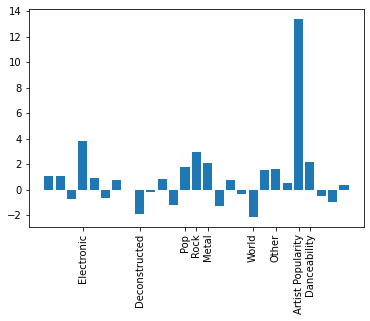

In [34]:
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=[3, 8, 12, 13, 14, 18, 20, 22, 23], labels=['Electronic', 'Deconstructed', 'Pop'\
                                               , 'Rock', 'Metal', 'World', 'Other', 'Artist Popularity', 'Danceability'])
plt.xticks(rotation=90)
plt.show()

In [35]:
df_predicted = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_predicted.head()

,Actual,Predicted
821,35,25.941573
2948,16,13.697624
9320,1,-1.486110
15714,1,-3.551858
5817,16,14.835627


In [36]:
# Trying other parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)

In [37]:
linreg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = linreg.predict(X_test)

In [39]:
r2_score(y_test, y_pred)

0.7995066719250008

In [40]:
df_predicted = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_predicted.head()

,Actual,Predicted
12955,0,-1.514641
4782,27,22.304978
5183,14,10.386897
7172,12,14.314786
14391,3,10.923548


In [41]:
Kfold = KFold(n_splits = 10, random_state=1, shuffle=True)

In [42]:
cv_r2_scores = cross_val_score(linreg, X, y, cv=Kfold, scoring='r2')
print(cv_r2_scores)

[0.79966014 0.80766892 0.7763693  0.81106587 0.80062086 0.81266794
 0.80223999 0.78536164 0.79834704 0.81239641]
